In [22]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
from ctau_utils import ctau_heavy

In [12]:
from parameters_dict import *
from const import alphaQED

In [6]:
physics_parameters['heavy']['bp']['Umu4_2']

{'m4': 0.1,
 'mz': 1.25,
 'alpha_dark': 0.4,
 'epsilon': 0.021447610589527218,
 'Umu4_2': 2.2e-07,
 'Ud4_2': 1}

In [27]:
m4 = 0.02

In [30]:
Ud4_2s = np.geomspace(physics_parameters['heavy']['bp']['Umu4_2'], physics_parameters['heavy']['bp']['Ud4_2'], 10)
m_zs = np.geomspace(0.05, 5, 11)
Ud4_2s, m_zs = np.meshgrid(Ud4_2s, m_zs, indexing='ij')

In [31]:
out = ctau_heavy(m4, m_zs, 
           Ud4_2s * physics_parameters['heavy']['bp']['alpha_dark'] * alphaQED * physics_parameters['heavy']['bp']['epsilon']**2, D_or_M='dirac')

<ipython-input-37-32bccc1cc06f>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Ud4_2s, m_zs, out, norm=LogNorm())


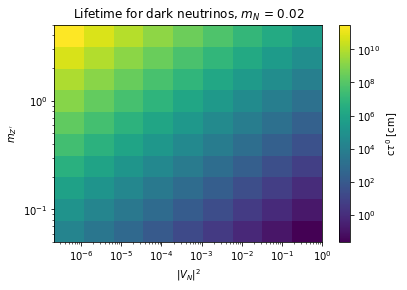

In [37]:
plt.pcolormesh(Ud4_2s, m_zs, out, norm=LogNorm())
plt.loglog()
plt.colorbar(label=r'c$\tau^0$ [cm]')
plt.title(f'Lifetime for dark neutrinos, $m_N$ = {m4}')
plt.ylabel(r'$m_{Z^\prime}$')
plt.xlabel(r'$|V_N|^2$')
plt.savefig('../fig/ccm_lifetime_study.pdf', bbox_inches='tight')